In [1]:
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

batting_csv_path = "../Data/team.csv"

complete_df =  pd.read_csv(batting_csv_path)


In [2]:
complete_df.head(10)

,year,league_id,team_id,franchise_id,div_id,rank,g,ghome,w,l,...,dp,fp,name,park,attendance,bpf,ppf,team_id_br,team_id_lahman45,team_id_retro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2
5,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,...,NaN,0.84,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1
6,1871,NaN,RC1,ROK,NaN,9,25,NaN,4,21,...,NaN,0.82,Rockford Forest Citys,Agricultural Society Fair Grounds,NaN,97,99,ROK,RC1,RC1
7,1871,NaN,TRO,TRO,NaN,6,29,NaN,13,15,...,NaN,0.84,Troy Haymakers,Haymakers' Grounds,NaN,101,100,TRO,TRO,TRO
8,1871,NaN,WS3,OLY,NaN,4,32,NaN,15,15,...,NaN,0.85,Washington Olympics,Olympics Grounds,NaN,94,98,OLY,WS3,WS3
9,1872,NaN,BL1,BLC,NaN,2,58,NaN,35,19,...,NaN,0.82,Baltimore Canaries,Newington Park,NaN,106,102,BAL,BL1,BL1


In [3]:
# CLEANING THE DATA

dh_df = pd.DataFrame(complete_df[['year', 'league_id', 'franchise_id','rank', 'g','ghome', 'w', 'l','r', 'ab',
                                'h', 'double', 'triple', 'hr', 'bb', 'so','ra', 'er', 'era',
                                'sho','ha', 'hra', 'bba','soa', 'e', 'dp', 'fp','attendance','bpf', 'ppf']])

In [4]:
rename_df = dh_df.rename(columns={'year':"Year", 'league_id':"League",'franchise_id':"Franchise", 'rank':"Rank",
                                 'g':"Games", 'w':"Wins", 'l':"Loses",'r':"Runs",'ab':"At_Bats", 'h': "Hits", 
                                 "double":"Doubles", 'triple':"Triples", 'hr':"HR", 'bb':"BB", 'so':"SO", 'ra':"RA",
                                 'er':"ER", 'era':"ERA", 'sho':"SHO", 'ha':"HA", 'hra':"HRA", 'bba':"BBA", 'soa':"SOA",
                                 'e':"Errors", 'dp':"DP",'fp':"FP", 'attendance':"Attendance", 'bpf':"DPF", 'ppf':"PPF"})

rename_df.columns

rename_df["Year"].dtypes

dtype('int64')

In [5]:
# GRABBING DATA FROM 1950-2015

Modern_df = rename_df.loc[(rename_df["Year"] > 1949)]

# BREAKING THE DATA DOWN BY LEAGUE

NL_df = Modern_df.loc[(rename_df["League"]== "NL")]

AL_df = Modern_df.loc[(rename_df["League"]== "AL")]
AL_df.reset_index()

AL_df.index = AL_df["Year"]
NL_df.index = NL_df["Year"]

In [6]:
# RUNS SCORED PER GAME ANALYSIS BETWEEN LEAUGES 

AL_Runs = pd.DataFrame(AL_df[["Year","Runs", "Games"]])
NL_Runs = pd.DataFrame(NL_df[["Year","Runs", "Games"]])

AL_Runs1 = pd.DataFrame(AL_Runs[["Runs","Games"]])
NL_Runs1 = pd.DataFrame(NL_Runs[["Runs","Games"]])

NL_Runs1.head(10)

,Runs,Games
Year,,
1950,847,155
1950,785,156
1950,643,154
1950,654,153
1950,735,154
1950,722,157
1950,681,154
1950,693,153
1951,855,158


In [7]:
# GROUPED BY YEARS

grouped_Runs_AL = AL_Runs1.groupby("Year")
grouped_Runs_NL = NL_Runs1.groupby("Year")

# TOTAL RUNS SCORED BY EACH TEAM FOR ALL YEARS

AL_Sums = grouped_Runs_AL["Runs"].sum() 
NL_Sums = grouped_Runs_NL["Runs"].sum() 

NL_Sums.head(10)

Year
1950    5760
1951    5552
1952    5158
1953    5914
1954    5624
1955    5578
1956    5275
1957    5426
1958    5419
1959    5462
Name: Runs, dtype: int64

In [8]:
# GETTING THE AVERAGE RUN PER GAME FOR A TEAM IN EACH LEAGUE

AL_RPG = pd.DataFrame(grouped_Runs_AL["Runs"].sum()/grouped_Runs_AL["Games"].sum()*162)
NL_RPG = pd.DataFrame(grouped_Runs_NL["Runs"].sum()/grouped_Runs_NL["Games"].sum()*162)

NL_RPG.head(10)

,0
Year,
1950,754.951456
1951,723.009646
1952,676.048544
1953,770.151125
1954,739.519481
1955,733.470779
1956,688.043478
1957,710.025848
1958,712.563312


In [9]:
# GETTING DIFFERENCE BY SUBRTRACTING WHAT WE JUST GOT 

Difference = pd.DataFrame(AL_RPG-NL_RPG)

Diff3 = Difference.rename(columns={0: "Run_Difference"})

Diff_reset = Diff3.reset_index()

Diff_reset.head(10)

,Year,Run_Difference
0,1950,61.972737
1,1951,27.389057
2,1952,1.038413
3,1953,-47.704523
4,1954,-60.867307
5,1955,-13.776604
6,1956,66.383706
7,1957,-24.944679
8,1958,-37.476074
9,1959,-6.996492


In [10]:
# PLOTTING THE RUNS PER GAME FOR EACH LEAUGE

#AL_RPG[0].plot(kind= "line", color= "b")
#NL_RPG[0].plot(kind= "line", color= "r")
#plt.title("Average RPG for an AL team vs. NL team ", size = 16)
#plt.xlabel("Years:   1950 - 2015", size = 14)
#plt.ylabel("Average Runs per game",size = 14)
#x_axis5 = Diff_reset["Year"]
#plt.ylim(3,6)

#plt.grid()
#plt.legend(["AL","NL"])

#plt.show()

In [11]:
# CREATING TRENDLINE

x_axis = Diff_reset["Year"]
y_axis = Diff3["Run_Difference"]

vc_slope2, vc_int2, vc_r2, vc_p2, vc_std_err2 = stats.linregress(
    x_axis, y_axis)
vc_fit2 = vc_slope2 * x_axis + vc_int2

<IPython.core.display.Javascript object>


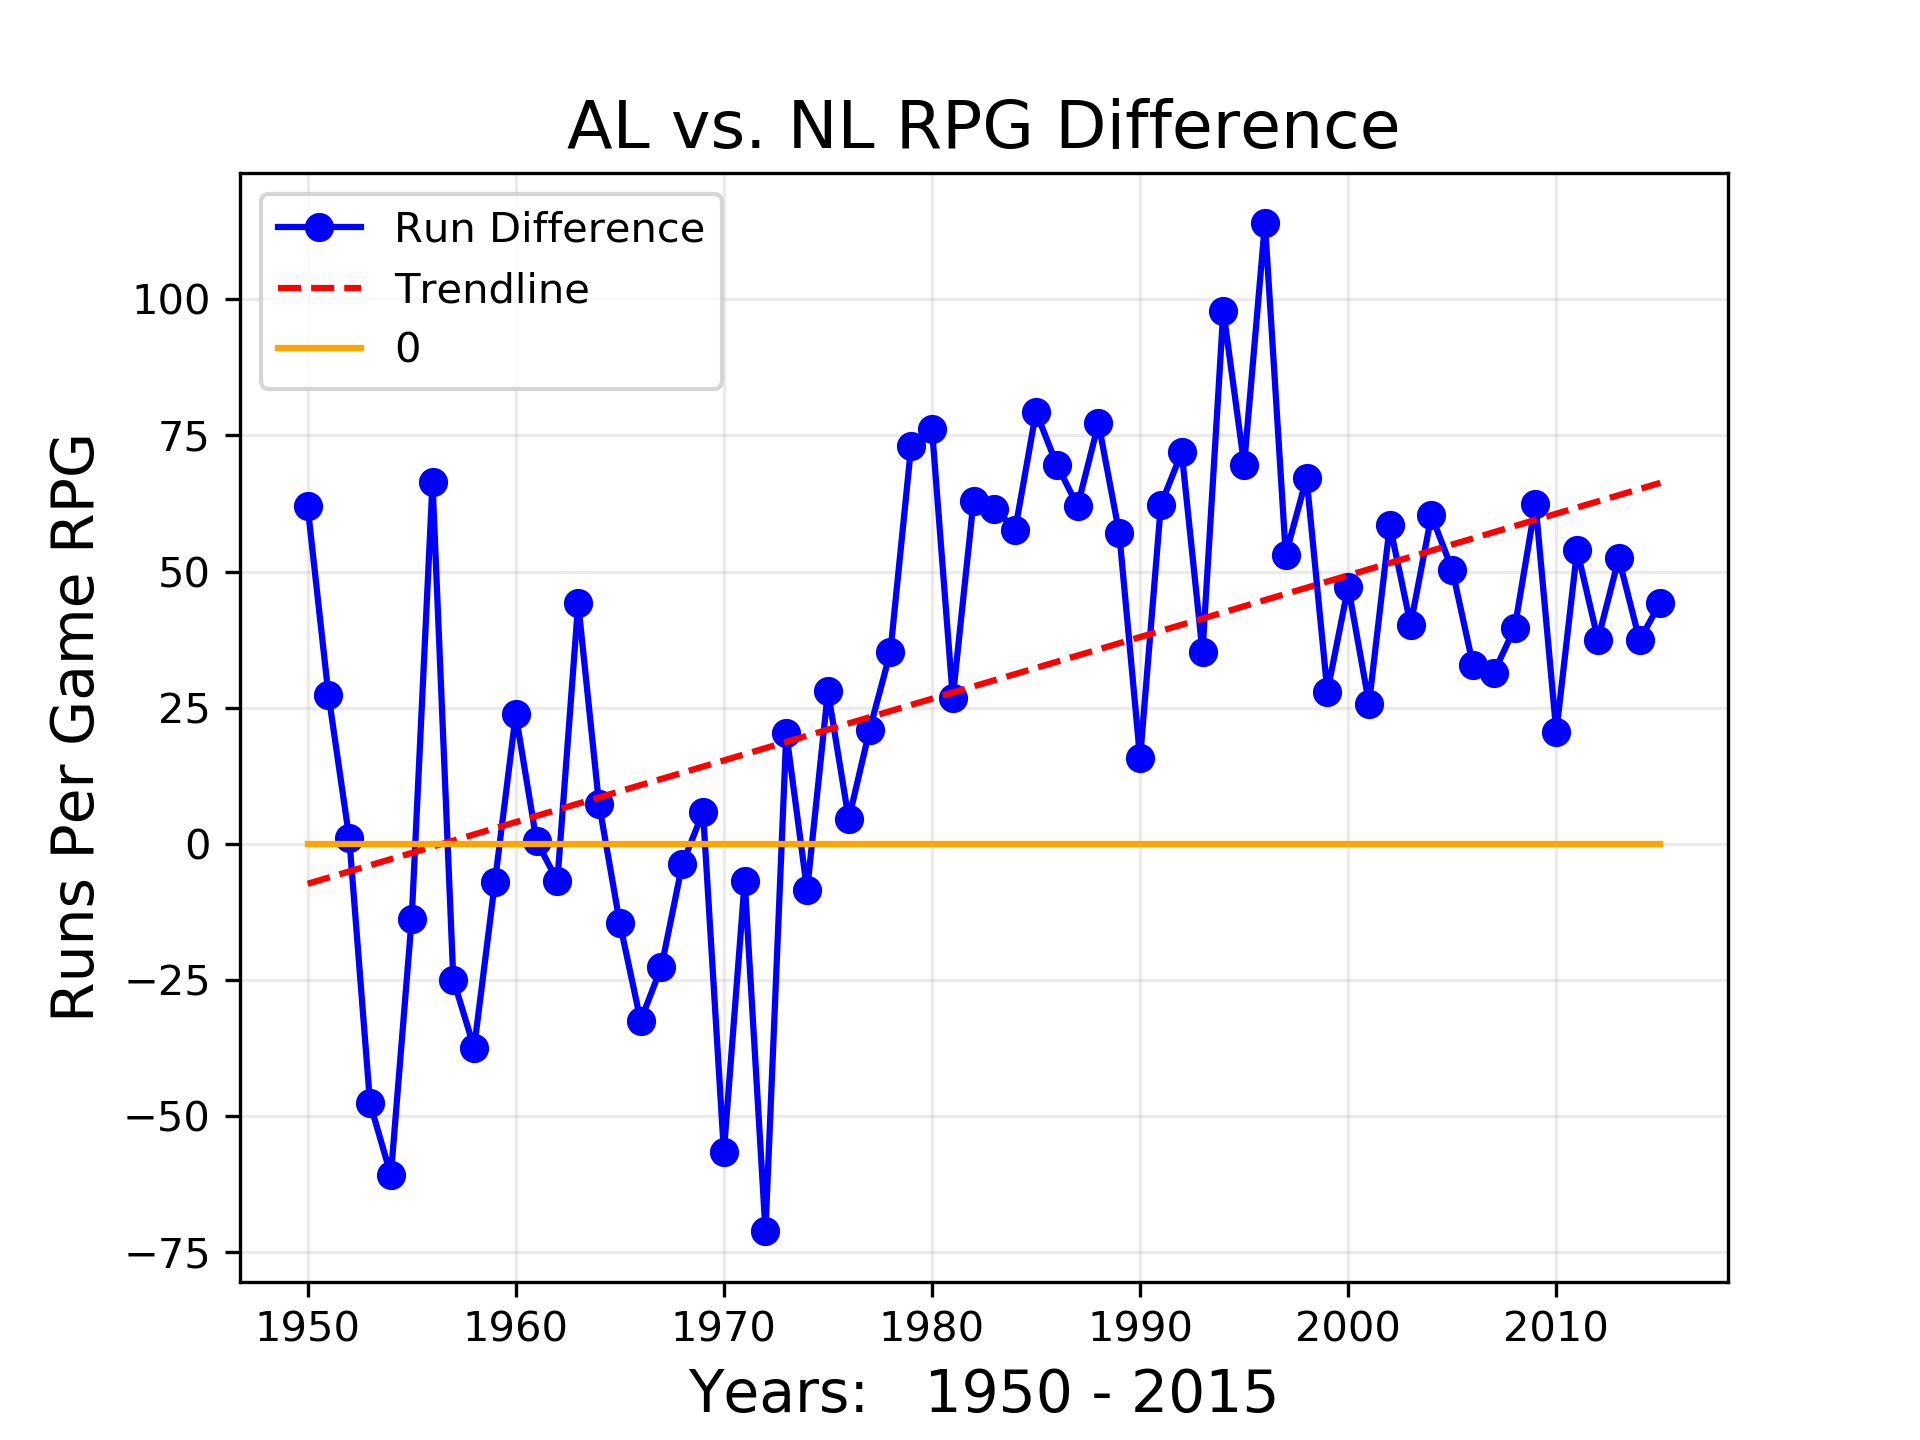

Since the Adoption of the DH, the AL has scored 29.473 more runs than the NL for each game, each year


In [23]:
# PLOTTING THE DIFFERENCE VARIABLE MADE ABOVE 

#Diff3["Run_Difference"].plot(kind= "line", color= "b", marker="o", label = "Run Difference")
plt.plot(x_axis, y_axis, color="b",  marker="o", label = "Run Difference")

plt.plot(x_axis, vc_fit2, "b--", color= "r")
plt.plot(x_axis, [0 for _ in range(len(x_axis))], color = "orange")

plt.title("AL vs. NL RPG Difference", size = 16)
plt.xlabel("Years:   1950 - 2015", size = 14)
plt.ylabel("Runs Per Game RPG", size = 14)
plt.grid(alpha= .25)
plt.legend(["Run Difference", "Trendline", "0"])


Average_Run_Dif = Diff3["Run_Difference"].mean()
ARD = round(Average_Run_Dif,3)

#plt.show()

print(f"Since the Adoption of the DH, the AL has scored {ARD} more runs than the NL for each game, each year")



In [24]:
# SAME ANALYSIS FOR HOME RUNS

plt.savefig('PRO_RPG.png')

AL_Home_Runs = pd.DataFrame(AL_df[["Year","HR", "Games"]])
NL_Home_Runs = pd.DataFrame(NL_df[["Year","HR", "Games"]])

AL_Home_Runs1 = pd.DataFrame(AL_Home_Runs[["HR","Games"]])

NL_Home_Runs1 = pd.DataFrame(NL_Home_Runs[["HR","Games"]])

In [25]:
grouped_Home_Runs_AL = AL_Home_Runs1.groupby("Year")
grouped_Home_Runs_NL = NL_Home_Runs1.groupby("Year")

AL_Sums_HR = pd.DataFrame(grouped_Home_Runs_AL["HR"].sum()) 
NL_Sums_HR = pd.DataFrame(grouped_Home_Runs_NL["HR"].sum())

AL_HRPG = pd.DataFrame(grouped_Home_Runs_AL["HR"].sum()/grouped_Runs_AL["Games"].sum()) #Average Runs per game, per year 
NL_HRPG = pd.DataFrame(grouped_Home_Runs_NL["HR"].sum()/grouped_Runs_NL["Games"].sum()) #Average Runs per game, per year 

#Home runs per year difference per year simulated over a normal 162 game season. Had to get per game numbers to factor out 
#the uneven number of teams and games played

HR_Difference = pd.DataFrame(AL_HRPG-NL_HRPG)

HR_Diff2 = HR_Difference.reset_index()

HR_Diff3 = HR_Diff2.rename(columns={0: "HR_Difference"})


In [26]:
x_axis1 = HR_Diff3["Year"]
y_axis1 = HR_Diff3["HR_Difference"]

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(
    x_axis1, y_axis1)
vc_fit = vc_slope * x_axis1 + vc_int

<IPython.core.display.Javascript object>


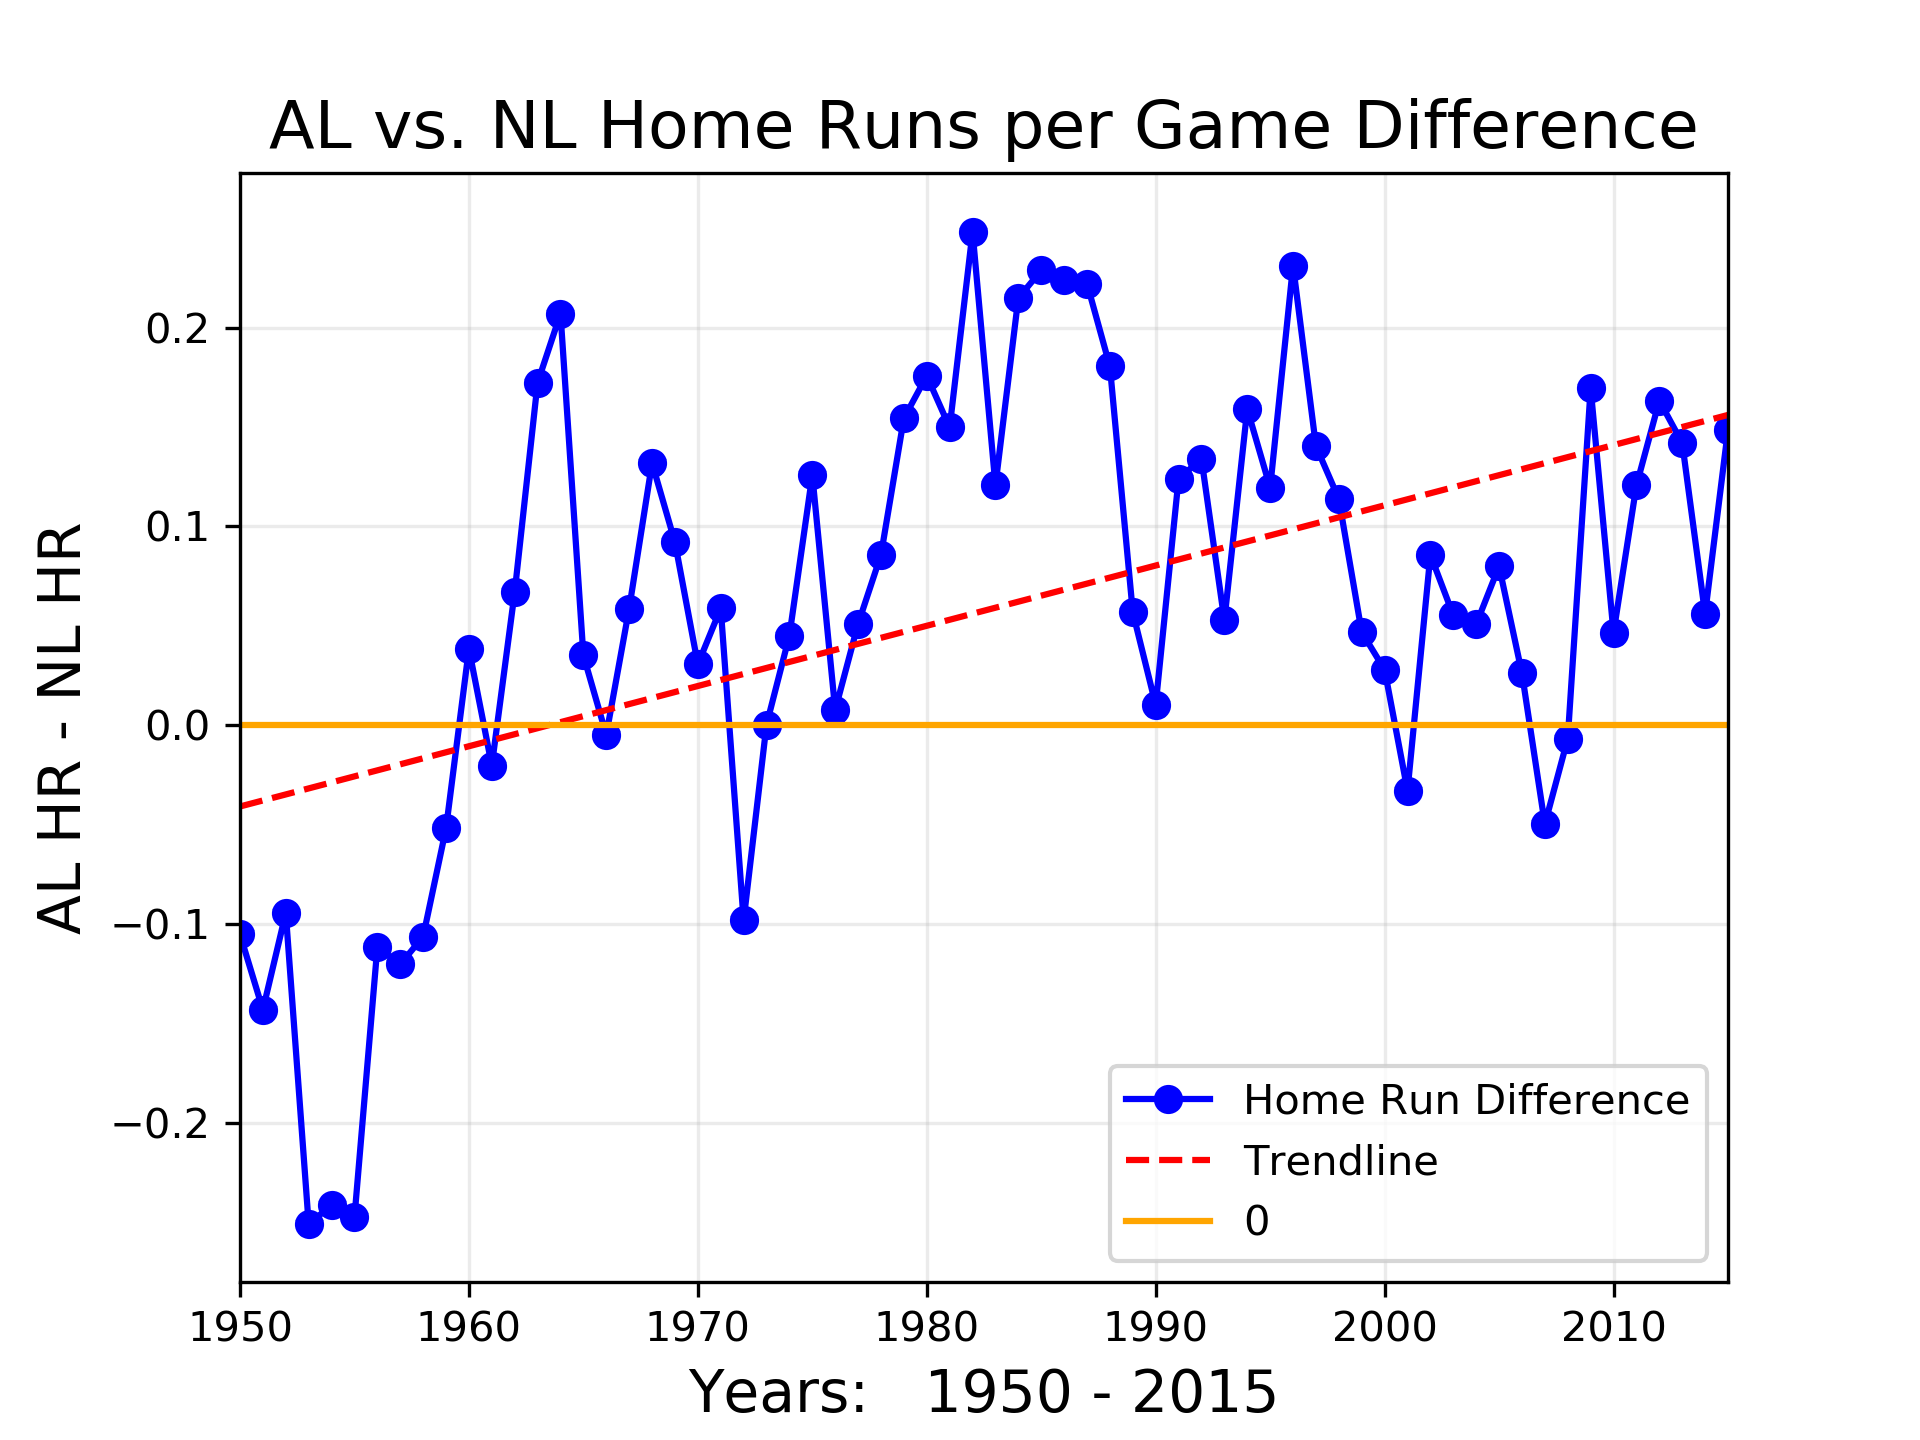

Since the Adoption of the DH, A team in the AL has hit 0.058 more home runs than a tean in the NL for each year


In [27]:
HR_Difference.plot(kind= "line",color= "b", marker="o", label="Home Runs")
plt.scatter(x_axis1, y_axis1, marker="*")
plt.plot(x_axis1, vc_fit, "b--", color= "r")
plt.plot(x_axis1, [0 for _ in range(len(x_axis))], color = "orange")

plt.title("AL vs. NL Home Runs per Game Difference", size = 16)
plt.xlabel("Years:   1950 - 2015", size = 14)
plt.ylabel("AL HR - NL HR", size = 14)
plt.grid(alpha= .25)
plt.legend(["Home Run Difference", "Trendline", "0"])

plt.show()

Average_HR_Run_Dif = HR_Diff3["HR_Difference"].mean()

AHRD = round(Average_HR_Run_Dif,3)

print(f"Since the Adoption of the DH, A team in the AL has hit {AHRD} more home runs than a tean in the NL for each year")

In [17]:
# Has the Addition of the DH added more shutouts for the AL vs. the NL

AL_SHO = pd.DataFrame(AL_df[["Year","SHO", "Games"]])
NL_SHO = pd.DataFrame(NL_df[["Year","SHO", "Games"]])

AL_SHO = pd.DataFrame(AL_SHO[["SHO","Games"]])
AL_SHO

NL_SHO = pd.DataFrame(NL_SHO[["SHO","Games"]])
#NL_SHO

In [18]:
grouped_SHO_AL = AL_SHO.groupby("Year")
grouped_SHO_NL = NL_SHO.groupby("Year")

AL_Sums3 = grouped_SHO_AL["SHO"].sum() #SHO per game, per year 
NL_Sums3 = grouped_SHO_NL["SHO"].sum() #Average Runs per game, per year 

AL_SHOPG = pd.DataFrame(grouped_SHO_AL["SHO"].sum()/grouped_SHO_AL["Games"].sum()*162) #FIGURE THIS OUT AGAIN!!!! WHY SO LOW?
NL_SHOPG = pd.DataFrame(grouped_SHO_NL["SHO"].sum()/grouped_SHO_NL["Games"].sum()*162) #IS IT .05 Per game over 43 Years?

Difference_SHO = pd.DataFrame(AL_SHOPG-NL_SHOPG)

Diff5 = Difference_SHO.reset_index()
Diff6 = Diff5.rename(columns={0: "SHO_Difference"})

In [19]:
x_axis3 = Diff6["Year"]
y_axis3 = Diff6["SHO_Difference"]

vc_slope3, vc_int3, vc_r3, vc_p3, vc_std_err3 = stats.linregress(
    x_axis3, y_axis3)
vc_fit3 = vc_slope3 * x_axis3 + vc_int3

<IPython.core.display.Javascript object>


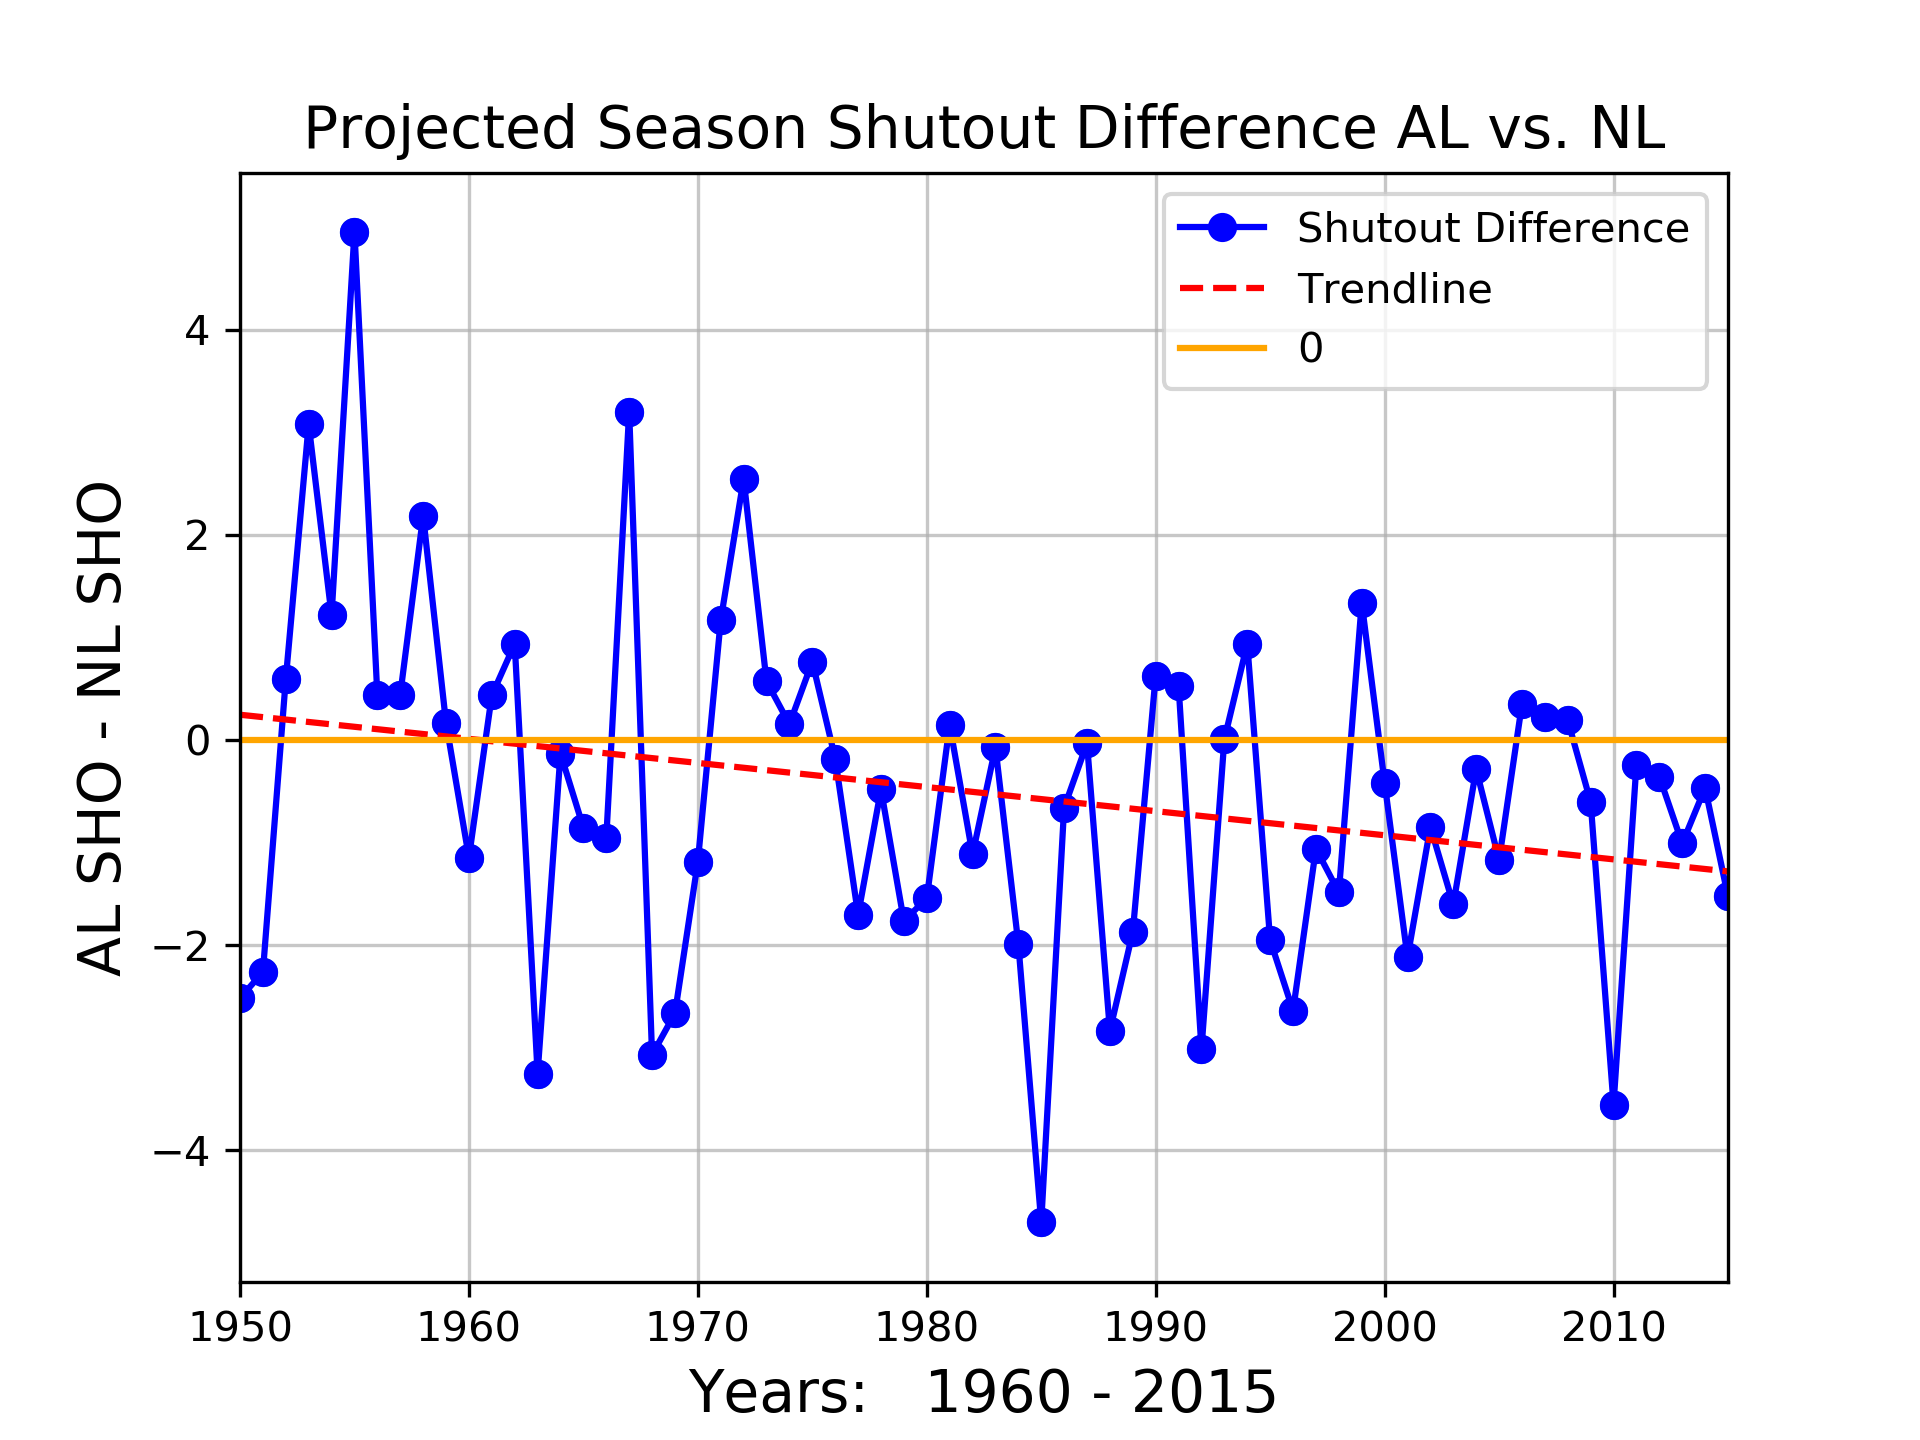

Since the Adoption of the DH, the AL has had -0.517 more Shut Outs than the NL for each game, each year


In [20]:
Difference_SHO.plot(kind= "line", color= "b", marker="o", label="Home Runs")
plt.scatter(x_axis3, y_axis3, marker="o")
plt.plot(x_axis3, vc_fit3, "b--", color = "r")
plt.plot(x_axis3, [0 for _ in range(len(x_axis3))], color = "orange")

plt.title("Projected Season Shutout Difference AL vs. NL", size= 14)
plt.xlabel("Years:   1960 - 2015", size = 14)
plt.ylabel("AL SHO - NL SHO", size = 14)
plt.grid(alpha= .7)
plt.legend(["Shutout Difference", "Trendline", "0"])

plt.show()

Average_SHO_Dif = Diff6["SHO_Difference"].mean()

ASD = round(Average_SHO_Dif,3)

print(f"Since the Adoption of the DH, the AL has had {ASD} more Shut Outs than the NL for each game, each year")

In [21]:
plt.savefig('SHO_PS.png')